<a href="https://colab.research.google.com/github/jelaenas/CESISTA-KJ-DSC1107/blob/main/CESISTA_KJ_LAB_FA1_Group_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("nycflights13")
library(nycflights13)
library(dplyr)

data(flights)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
## Task A1. Dataset Overview
str(flights) # structure
dim(flights) # dimensions

glimpse(flights)
n_obs <- nrow(flights)
n_vars <- ncol(flights)

cat(sprintf("Number of observations: %d \n", n_obs))
cat(sprintf("Number of variables: %d \n", n_vars))

numeric_var <- names(flights)[sapply(flights, is.numeric)]
categorical_var <- names(flights)[sapply(flights, is.character)]

cat("Numeric variables:\n")
print(numeric_var)

cat("\nCategorical variables:\n")
print(categorical_var)

## Task A2. Data Cleaning

missing_depdelay <- sum(is.na(flights$dep_delay))
missing_arrdelay <-sum(is.na(flights$arr_delay))

cat(sprintf("\nMissing values in dep_delay:%d\n", missing_depdelay))
cat(sprintf("\nMissing values in arr_delay:%d\n", missing_arrdelay))

flights_clean <- flights %>%
  filter(!is.na(dep_delay) & !is.na(arr_delay))

new_missing_depdelay <- sum(is.na(flights_clean$dep_delay))
new_missing_arrdelay <-sum(is.na(flights_clean$arr_delay))

cat(sprintf("\nMissing values in dep_delay in cleaned dataset:%d\n", new_missing_depdelay))
cat(sprintf("\nMissing values in arr_delay in cleaned dataset: %d\n", new_missing_arrdelay))

dim(flights_clean)


tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : ch

[1] 336776     19

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

[1] 327346     19

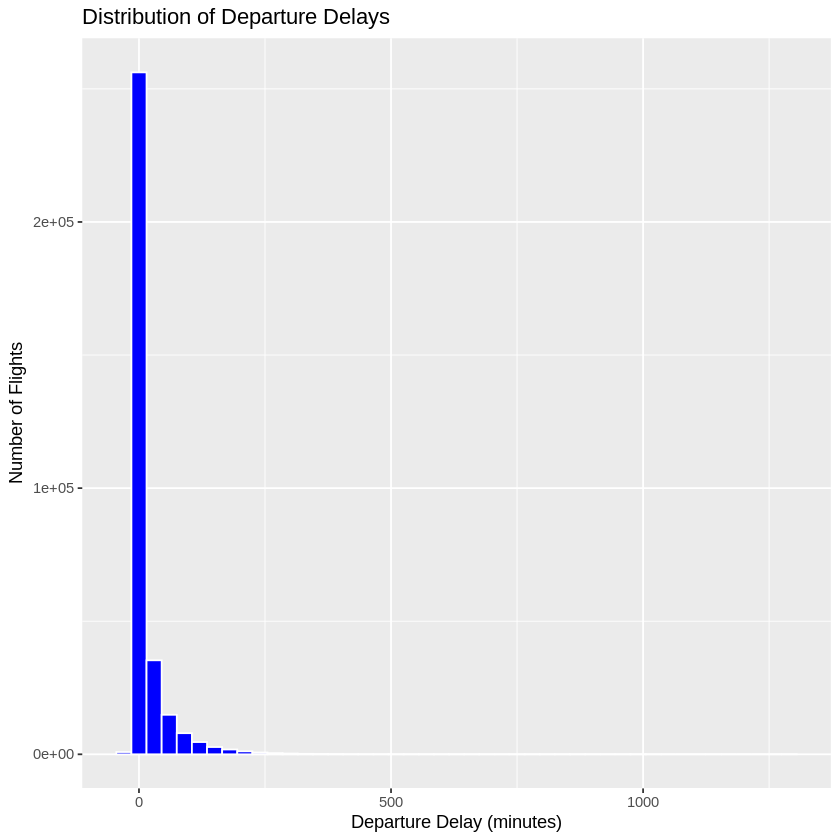

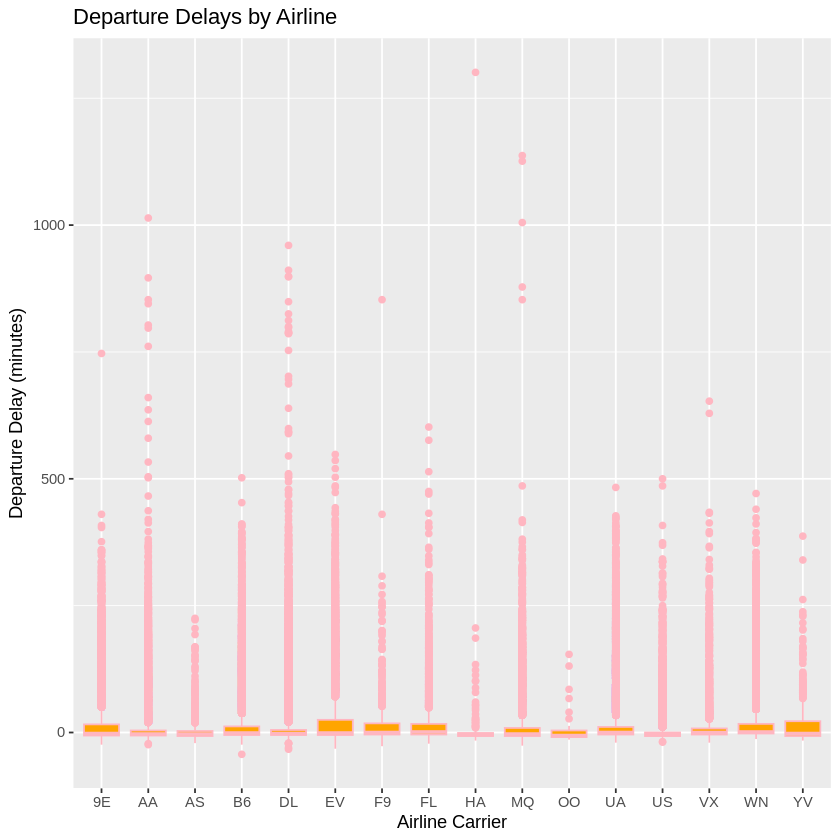

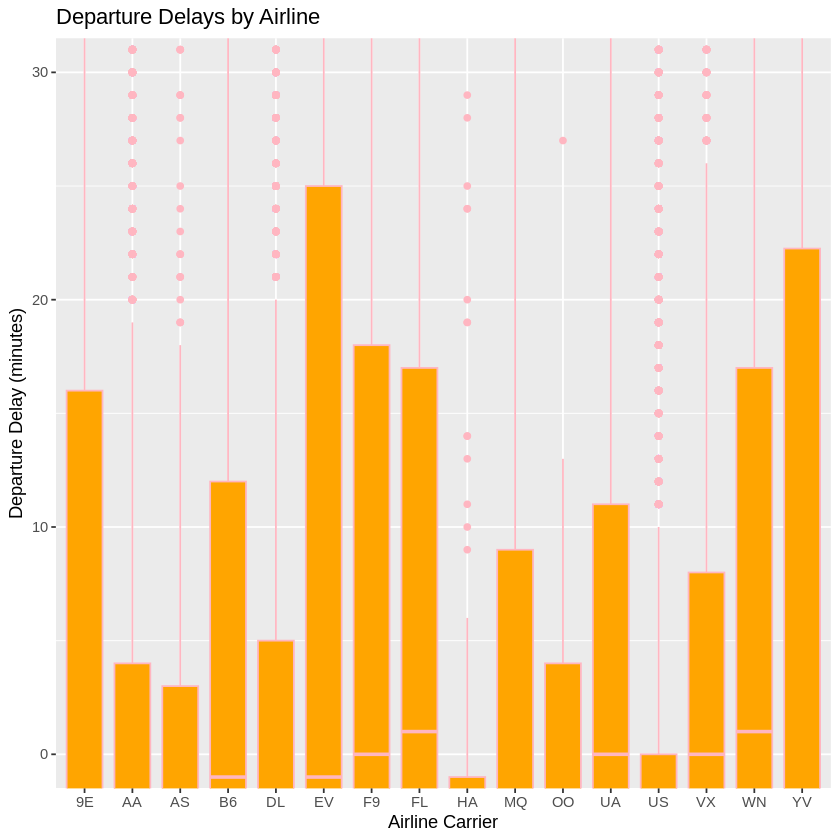

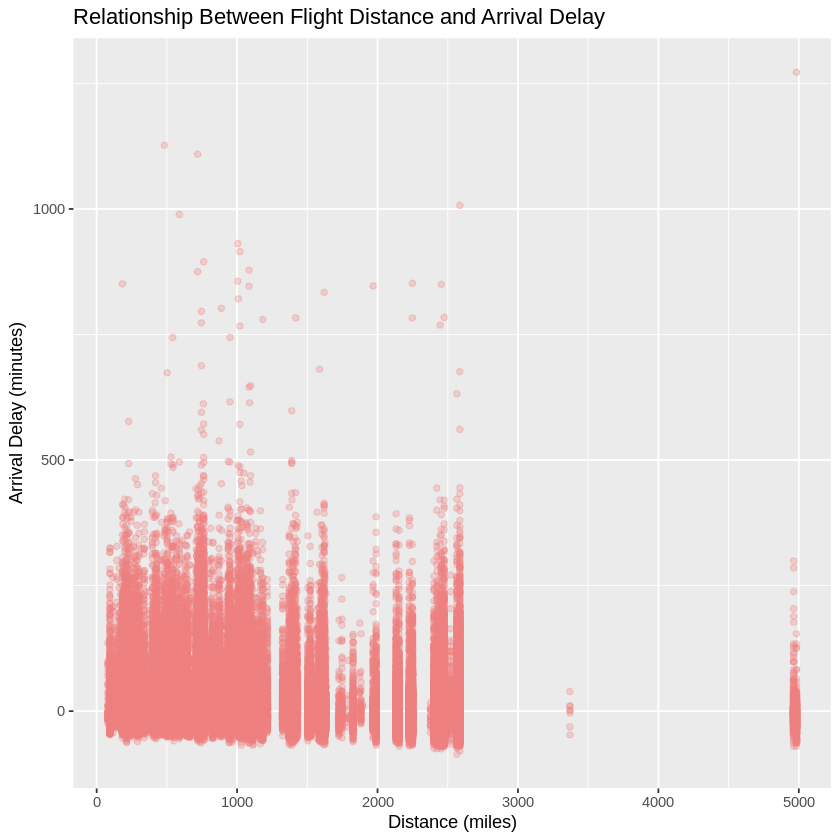

In [38]:
library(ggplot2)
## Task B1. Distribution of Departure Delays

ggplot(flights_clean, aes(x = dep_delay)) +
  geom_histogram(binwidth = 30, fill = "blue", color = "white") +
  labs(
    title = "Distribution of Departure Delays",
    x = "Departure Delay (minutes)",
    y = "Number of Flights"
  )

  ## Task B2. Flight Delays by Airline

  ggplot(flights_clean, aes(x = carrier, y = dep_delay)) +
  geom_boxplot(fill = "orange", color = "light pink") +
  labs(
    title = "Departure Delays by Airline",
    x = "Airline Carrier",
    y = "Departure Delay (minutes)"
  )

  ggplot(flights_clean, aes(x = carrier, y = dep_delay)) +
  geom_boxplot(fill = "orange", color = "light pink") +
  labs(
    title = "Departure Delays by Airline",
    x = "Airline Carrier",
    y = "Departure Delay (minutes)"
  ) + coord_cartesian(ylim = c(0, 30))

## Task B3. Relationship Between Distance and Arrival Delay

ggplot(flights_clean, aes(x = distance, y = arr_delay)) +
  geom_point(alpha = 0.3, color = "light coral") +
  labs(
    title = "Relationship Between Flight Distance and Arrival Delay",
    x = "Distance (miles)",
    y = "Arrival Delay (minutes)"
  )



**Task B2**

Based on the boxplot, EV airline has the greatest variability in delays as its box is the longest.

Departure Delay - Mean: 12.56, Median: -2.00
Arrival Delay   - Mean: 6.90, Median: -5.00


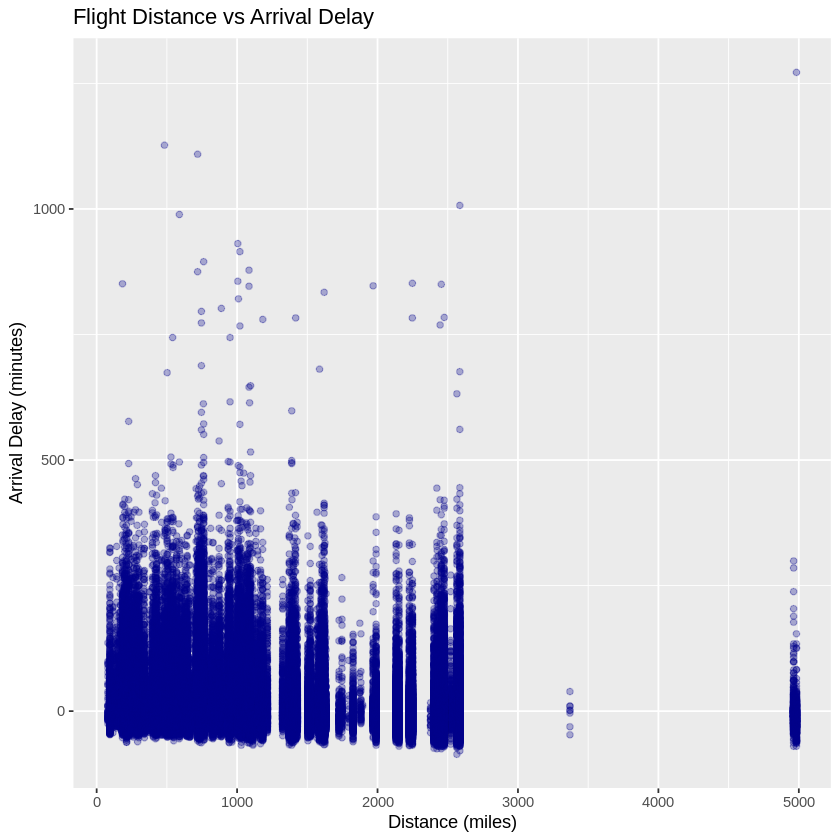

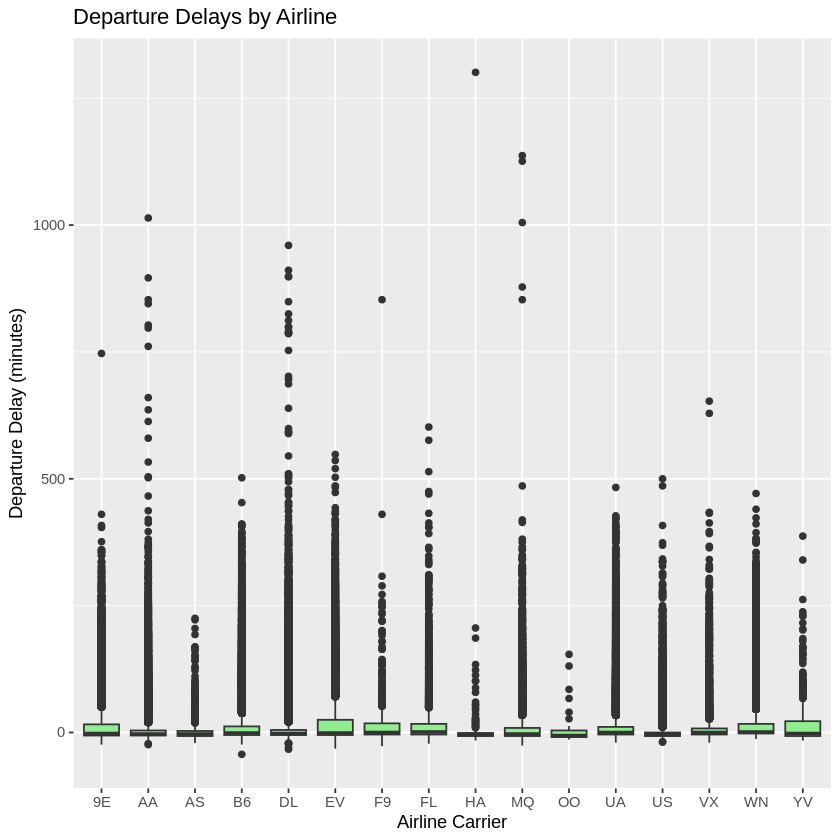

In [40]:
## Task C1. Summary Statistics

mean_dep <- mean(flights_clean$dep_delay)
median_dep <- median(flights_clean$dep_delay)

mean_arr <- mean(flights_clean$arr_delay)
median_arr <- median(flights_clean$arr_delay)

cat(sprintf("Departure Delay - Mean: %.2f, Median: %.2f\n", mean_dep, median_dep))
cat(sprintf("Arrival Delay   - Mean: %.2f, Median: %.2f\n", mean_arr, median_arr))

## Task C2. Insight Question

ggplot(flights_clean, aes(x = distance, y = arr_delay)) +
  geom_point(alpha = 0.3, color = "darkblue") +
  labs(
    title = "Flight Distance vs Arrival Delay",
    x = "Distance (miles)",
    y = "Arrival Delay (minutes)"
  )

ggplot(flights_clean, aes(x = carrier, y = dep_delay)) +
  geom_boxplot(fill = "lightgreen") +
  labs(
    title = "Departure Delays by Airline",
    x = "Airline Carrier",
    y = "Departure Delay (minutes)"
  )



**Task C1**
The mean and median may vary as the mean is usually more affected by outliers in the data.

**Task C2**
Two factors that can affect flight delay are distance and airline. As shown in the scatter plot, longer distances are usally prone to flight delays. Meanwhile the box plot shows that certain airlines experience flight delays more frequently.
